In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report



In [2]:

iris = load_iris()
X_class, y_class = iris.data, iris.target

# Train-test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Scaling
scaler_c = StandardScaler()
X_train_c = scaler_c.fit_transform(X_train_c)
X_test_c = scaler_c.transform(X_test_c)

# SVC with linear kernel
svc_linear = SVC(kernel='linear', C=1.0, random_state=42)
svc_linear.fit(X_train_c, y_train_c)
y_pred_c_linear = svc_linear.predict(X_test_c)

print("🔹 Classification Report (Linear Kernel):")
print(classification_report(y_test_c, y_pred_c_linear))
print("Accuracy:", accuracy_score(y_test_c, y_pred_c_linear))


🔹 Classification Report (Linear Kernel):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667


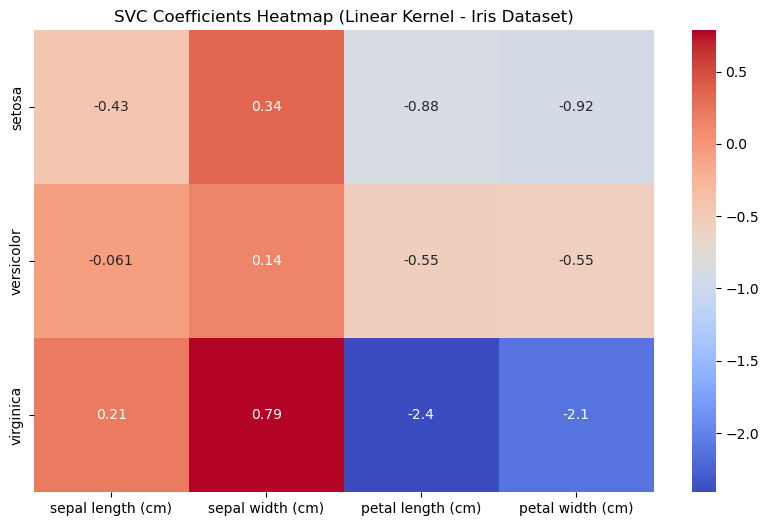

In [3]:

# Visualize SVC Coefficients for linear kernel
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(svc_linear.coef_, columns=iris.feature_names, index=iris.target_names),
            annot=True, cmap='coolwarm')
plt.title("SVC Coefficients Heatmap (Linear Kernel - Iris Dataset)")
plt.show()


In [4]:

# SVC with RBF kernel
svc_rbf = SVC(kernel='rbf', C=1.0, random_state=42)
svc_rbf.fit(X_train_c, y_train_c)
y_pred_c_rbf = svc_rbf.predict(X_test_c)

print("🔹 Classification Report (RBF Kernel):")
print(classification_report(y_test_c, y_pred_c_rbf))
print("Accuracy:", accuracy_score(y_test_c, y_pred_c_rbf))


🔹 Classification Report (RBF Kernel):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


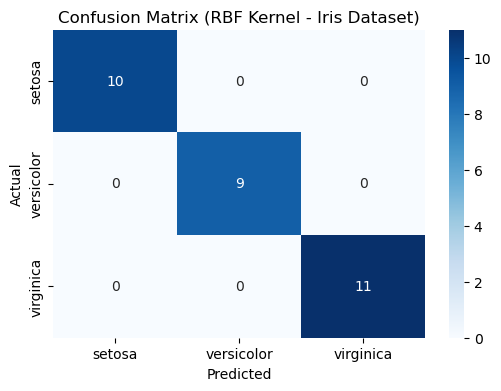

In [5]:

# Confusion matrix (RBF)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_c, y_pred_c_rbf), annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix (RBF Kernel - Iris Dataset)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [6]:

california = fetch_california_housing()
X_reg, y_reg = california.data, california.target

# Train-test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Scaling
scaler_r = StandardScaler()
X_train_r = scaler_r.fit_transform(X_train_r)
X_test_r = scaler_r.transform(X_test_r)

# SVR with linear kernel
svr_linear = SVR(kernel='linear', C=1.0)
svr_linear.fit(X_train_r, y_train_r)
y_pred_r_linear = svr_linear.predict(X_test_r)

print("\n🔹 Regression Results (Linear Kernel):")
print("MSE:", mean_squared_error(y_test_r, y_pred_r_linear))



🔹 Regression Results (Linear Kernel):
MSE: 0.5792049946323379



🔹 Regression Results (RBF Kernel):
MSE: 0.3570026426754465


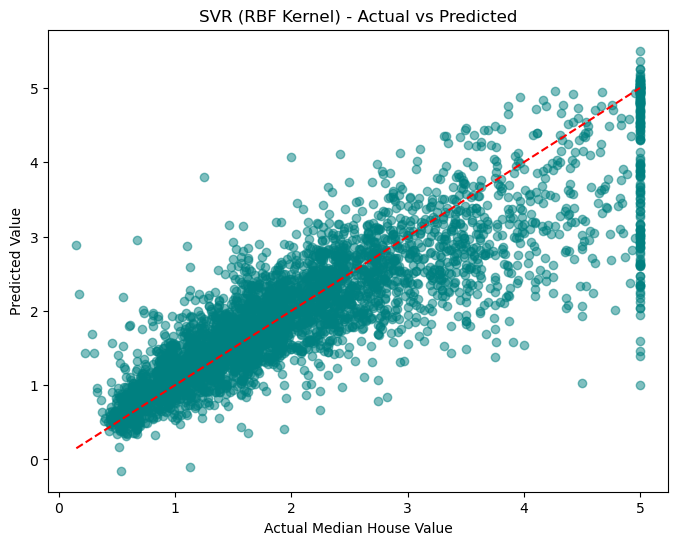

In [7]:

# SVR with RBF kernel
svr_rbf = SVR(kernel='rbf', C=1.0)
svr_rbf.fit(X_train_r, y_train_r)
y_pred_r_rbf = svr_rbf.predict(X_test_r)

print("\n🔹 Regression Results (RBF Kernel):")
print("MSE:", mean_squared_error(y_test_r, y_pred_r_rbf))

# Plotting Actual vs Predicted (RBF)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_r, y_pred_r_rbf, alpha=0.5, color='teal')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Value")
plt.title("SVR (RBF Kernel) - Actual vs Predicted")
plt.plot([min(y_test_r), max(y_test_r)], [min(y_test_r), max(y_test_r)], 'r--')  # Line y=x
plt.show()
